In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
# Load Dataset
df = pd.read_csv("Reviews.csv")

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df = df[['Text','Score']]

In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    568454 non-null  object
 1   Score   568454 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [9]:
df.describe()

,Score
count,568454.000000
mean,4.183199
std,1.310436
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
# Basic Statistics
print(df['Score'].value_counts())

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64


C:\Users\snila\AppData\Local\Temp\ipykernel_15564\4002658002.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score',data=df,palette='rainbow')


<Axes: xlabel='Score', ylabel='count'>

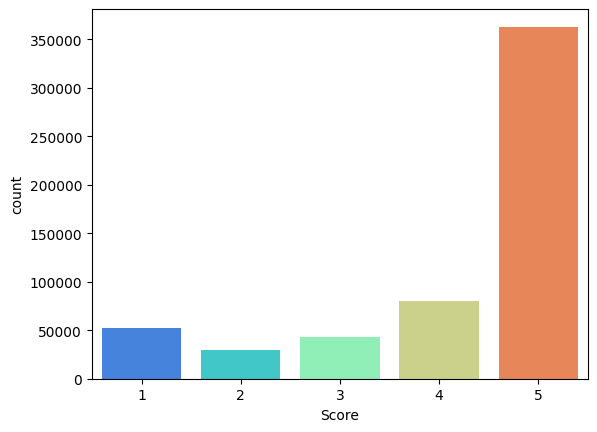

In [11]:
sns.countplot(x='Score',data=df,palette='rainbow')

In [12]:
df['review_length'] = df['Text'].apply(len)

In [13]:

print(df['review_length'].describe())

count    568454.000000
mean        436.222083
std         445.339741
min          12.000000
25%         179.000000
50%         302.000000
75%         527.000000
max       21409.000000
Name: review_length, dtype: float64


In [14]:
df.head()

,Text,Score,review_length
0,I have bought several of the Vitality canned d...,5,263
1,Product arrived labeled as Jumbo Salted Peanut...,1,190
2,This is a confection that has been around a fe...,4,509
3,If you are looking for the secret ingredient i...,2,219
4,Great taffy at a great price. There was a wid...,5,140


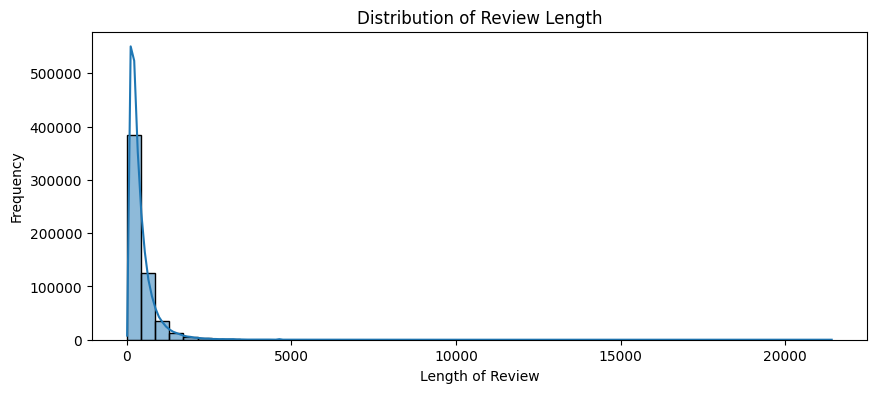

In [15]:
# Review Length Distribution
plt.figure(figsize=(10,4))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Length")
plt.xlabel("Length of Review")
plt.ylabel("Frequency")
plt.show()

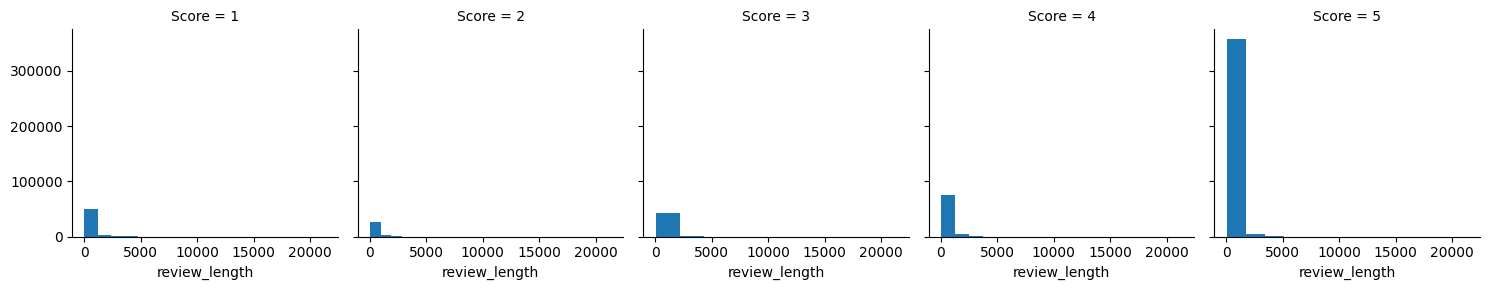

In [16]:
g = sns.FacetGrid(df,col='Score')
g.map(plt.hist,'review_length')

In [17]:
# Binary Classification: Only Positive and Negative
df = df[df['Score'] != 3]
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

C:\Users\snila\AppData\Local\Temp\ipykernel_15564\2105043354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)


In [18]:
# Text Preprocessing Function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [19]:

# Cleaned Text
df['cleaned_text'] = df['Text'].apply(preprocess)

C:\Users\snila\AppData\Local\Temp\ipykernel_15564\1439081616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['Text'].apply(preprocess)


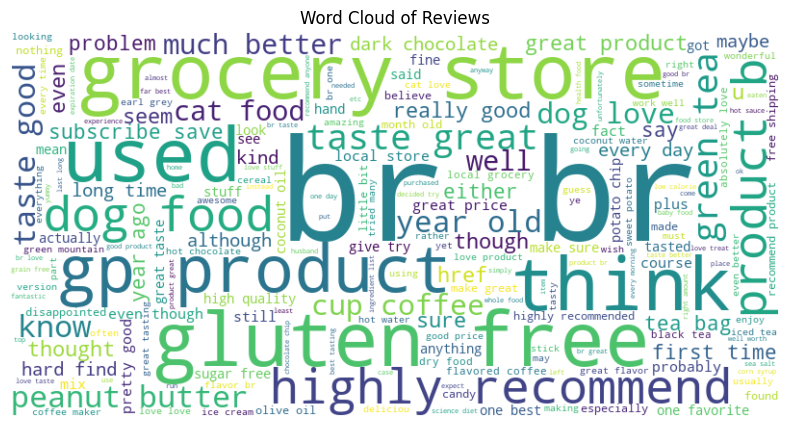

In [20]:
# Word Cloud
all_words = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()

In [21]:
X = df['cleaned_text']
y = df['Sentiment']

# Convert text into numerical vectors
vectorizer = CountVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [23]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [24]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9028840942156462
Confusion Matrix:
 [[11666  4713]
 [ 5500 83284]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70     16379
           1       0.95      0.94      0.94     88784

    accuracy                           0.90    105163
   macro avg       0.81      0.83      0.82    105163
weighted avg       0.90      0.90      0.90    105163



In [25]:
# Top Bigrams
def get_top_ngrams(corpus, ngram_range=(2,2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

bigrams = get_top_ngrams(df['cleaned_text'], (2, 2), 10)
print("Top Bigrams:")
for phrase, count in bigrams:
    print(f"{phrase}: {count}")

Top Bigrams:
br br: 231400
taste like: 23874
amazon com: 19958
grocery store: 15899
gluten free: 15570
http www: 14773
www amazon: 14684
com gp: 14527
gp product: 14524
highly recommend: 14434


In [33]:

# Sentiment Analysis
df['polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

C:\Users\snila\AppData\Local\Temp\ipykernel_15564\4085487151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [34]:
# Create binary sentiment label
df['Sentiment'] = df['polarity'].apply(lambda x: 1 if x > 0 else 0)

C:\Users\snila\AppData\Local\Temp\ipykernel_15564\1882673014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['polarity'].apply(lambda x: 1 if x > 0 else 0)


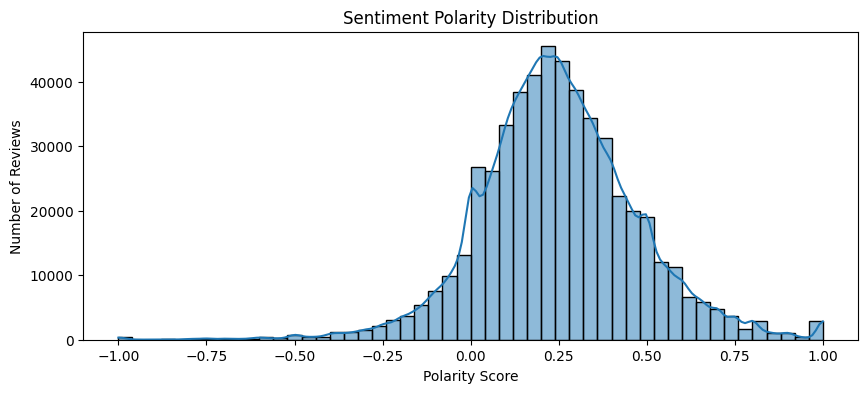

In [35]:
# Sentiment Distribution
plt.figure(figsize=(10,4))
sns.histplot(df['polarity'], bins=50, kde=True)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity Score")
plt.ylabel("Number of Reviews")
plt.show()

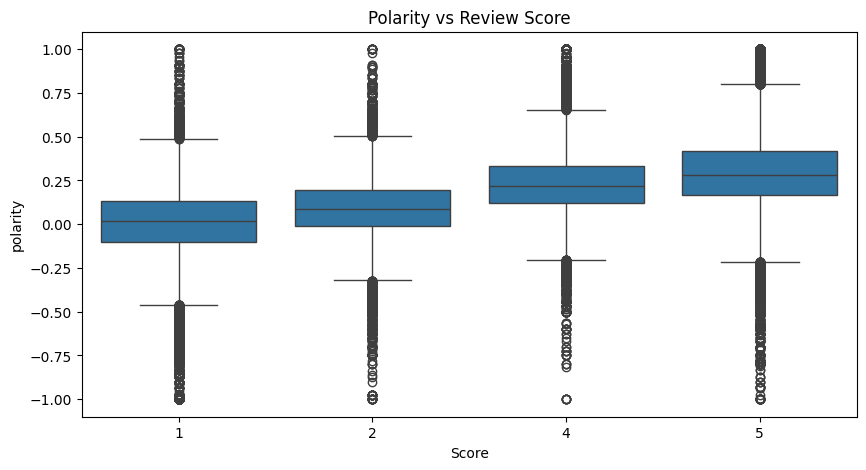

In [ ]:
# Polarity vs Score Relationship
plt.figure(figsize=(10,5))
sns.boxplot(x='Score', y='polarity', data=df)
plt.title("Polarity vs Review Score")
plt.show()

In [38]:
X = df['cleaned_text']
y = df['Sentiment']

# Convert text into numerical vectors
vectorizer = CountVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [40]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [41]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8699257343362209
Confusion Matrix:
 [[ 6843  5098]
 [ 8581 84641]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.57      0.50     11941
           1       0.94      0.91      0.93     93222

    accuracy                           0.87    105163
   macro avg       0.69      0.74      0.71    105163
weighted avg       0.89      0.87      0.88    105163

